In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
def get_session(gpu_fraction=0.3):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
KTF.set_session(get_session())

In [102]:
xtrain = np.load("xtrain_3.npy")
ytrain = np.load("ytrain_3.npy")

In [103]:
xtrain.shape

(25000, 224, 224, 3)

In [104]:
ytrain.shape

(25000,)

In [105]:
import tensorflow as tf
with tf.Session() as sess:
    ytrain = sess.run(tf.one_hot(ytrain,depth=2))

In [106]:
def shuffle(a,b):
    assert len(a) == len(b)
    i = np.random.permutation(len(a))
    return (a[i],b[i])

In [107]:
from keras.applications import ResNet50

In [108]:
base_model = ResNet50(include_top=False,weights='imagenet')

In [109]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras import Model

In [110]:
base = base_model.output
layer1 = GlobalAveragePooling2D()(base)
layer2 = Dense(1024,activation="relu")(layer1)
prediction = Dense(2,activation='softmax')(layer2)
model = Model(inputs=base_model.input,outputs=prediction)

In [111]:
# model.summary()

## training the last layer 

In [112]:
# for i,layer in enumerate(base_model.layers):
#     print(i,layer.name)

In [113]:
for layer in base_model.layers:
    layer.trainable = False

In [114]:
# model.summary()

In [115]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [116]:
model.fit(x=xtrain,y=ytrain,batch_size=100,epochs=10,verbose=1,validation_split=0.2) 

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.0862 - acc: 0.9694 - val_loss: 0.4111 - val_acc: 0.8910
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.0457 - acc: 0.9833 - val_loss: 0.2445 - val_acc: 0.9410
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.0321 - acc: 0.9879 - val_loss: 0.4456 - val_acc: 0.9038
Epoch 4/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.0252 - acc: 0.9906 - val_loss: 0.3166 - val_acc: 0.9424
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.0176 - acc: 0.9940 - val_loss: 0.3837 - val_acc: 0.9288
Epoch 6/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.0147 - acc: 0.9947 - val_loss: 0.4331 - val_acc: 0.9302
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.0149 - acc: 0.9947 - val_loss: 0.2609 - val_acc:

## fine tuning

In [117]:
# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

In [118]:
for layer in model.layers[:250]:
    layer.trainable = False
for layer in model.layers[250:]:
    layer.trainable = True

In [119]:
# model.summary()

In [120]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [124]:
model.fit(x=xtrain,y=ytrain,batch_size=50,epochs=50,verbose=1,validation_split=0.2)

# testing

In [177]:
predict = model.predict(xx,verbose=1)

5000/5000 [==============================] - 5s 1ms/step


Text(0.5,1,'Actual : 1 <-> Predicted : 1')

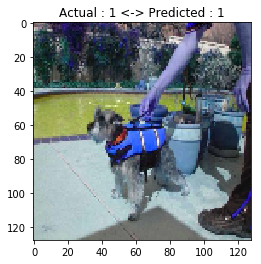

In [189]:
index=205
plt.imshow(xx[index])
plt.title("Actual : {} <-> Predicted : {}".format(np.argmax(yy[index]),np.argmax(predict[index])))

In [190]:
accuracy = np.mean(list(map(int,list(map(lambda x,y:x==y,np.argmax(predict,axis=1),np.argmax(yy,axis=1))))))

In [191]:
accuracy

0.5218